In [23]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import yaml
import torch
import torch.nn as nn
import warnings
sys.path.append(str(Path(os.getcwd()).parent))  
from src.train_multi_seed import train
from src.generate_graphs import *

In [24]:
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.grid"] = True
SEEDS = [42, 123, 999]

In [25]:
# Exemple d'entrainenement de l'agent 4 avec le ssed 123:
# ================== CONFIG ==================
AGENT = "agent4"
SEED = 123
PROJECT_ROOT = Path.cwd().parent  # dossier parent du notebook
CONFIG_DIR = PROJECT_ROOT / "configs"
RESULTS_DIR = PROJECT_ROOT / "results"
RESULTS_DIR.mkdir(exist_ok=True)

In [5]:
# ================== LOAD CONFIG ==================
cfg_path = CONFIG_DIR / f"{AGENT}.yaml"
if not cfg_path.exists():
    raise FileNotFoundError(f"Fichier config introuvable: {cfg_path}")

with open(cfg_path, 'r', encoding='utf-8') as f:
    config = yaml.safe_load(f)

# Vérifier les champs requis
required_fields = ['env_name', 'K', 'n_steps', 'lr_actor', 'lr_critic','gamma', 'max_steps', 'entropy_coef', 'eval_freq']
missing = [f for f in required_fields if f not in config]
if missing:
    raise ValueError(f"Champs manquants dans {AGENT}.yaml: {missing}")

# ================== TRAINING ==================
print(f"⚡ TRAINING {AGENT.upper()} avec seed {SEED}")
print(f"K={config['K']}, n_steps={config['n_steps']}, stochastic={config.get('stochastic_rewards', False)}")
print(f"lr_actor={config['lr_actor']}, lr_critic={config['lr_critic']}")

train(config, SEED, AGENT)

print("✅ TRAINING TERMINÉ")

⚡ TRAINING AGENT4 avec seed 123
K=6, n_steps=6, stochastic=True
lr_actor=0.0003, lr_critic=0.003


agent4-seed123: 500004it [03:41, 2252.74it/s, eval_r=500.0, train_r=270.0, actor_l=0.0218, critic_l=0.2138, ent=0.585]                             


✅ Saved: agent4 seed 123 (1 trajectories)
✅ TRAINING TERMINÉ


In [6]:
# pip install numpy<2

In [28]:
from src.model import ActorCritic
from src.generate_graphs import *

PROJECT_ROOT = Path.cwd().parent  
plots_dir = create_plots_directory(PROJECT_ROOT)
from pathlib import Path

results_dir = PROJECT_ROOT / "results"
results_dir.mkdir(exist_ok=True)  # crée le dossier si inexistant

data = load_all_data(results_dir)

print(" Chargement des données...")
# data = load_all_data("results")

 Chargement des données...


In [29]:
# Liste des plots à générer
plot_learning_curves(data, plots_dir)
plot_training_rewards(data, plots_dir)
plot_loss_dynamics(data, plots_dir)
plot_value_evolution(data, plots_dir)
plot_trajectory_values(data, plots_dir)
plot_entropy_evolution(data, plots_dir)
plot_performance_comparison(data, plots_dir)
plot_training_stability(data, plots_dir)
plot_correlation_heatmap(data, plots_dir)
plot_convergence_speed(data, plots_dir)
plot_final_rewards_per_agent(data, plots_dir)


✅ Sauvegardé: c:\Users\Fatma CHAHED\RL-Project\plots\1_learning_curves.png
✅ Sauvegardé: c:\Users\Fatma CHAHED\RL-Project\plots\2_training_rewards.png
✅ Sauvegardé: c:\Users\Fatma CHAHED\RL-Project\plots\3_loss_dynamics.png
✅ Sauvegardé: c:\Users\Fatma CHAHED\RL-Project\plots\4_value_evolution.png
✅ Sauvegardé: c:\Users\Fatma CHAHED\RL-Project\plots\5_trajectory_values.png
✅ Sauvegardé: c:\Users\Fatma CHAHED\RL-Project\plots\6_entropy_evolution.png
✅ Sauvegardé: c:\Users\Fatma CHAHED\RL-Project\plots\7_performance_comparison.png
✅ Sauvegardé: c:\Users\Fatma CHAHED\RL-Project\plots\8_training_stability.png
✅ Sauvegardé: c:\Users\Fatma CHAHED\RL-Project\plots\9_correlation_heatmap.png
✅ Sauvegardé: c:\Users\Fatma CHAHED\RL-Project\plots\10_convergence_speed.png

📊 Convergence Speed Summary:
Agent        K          Steps (mean±std)        Updates (mean±std)
agent4       6    60048 ±      0 steps      10008 ±      0 updates
💡 Updates = Steps / K (fair comparison)
✅ Sauvegardé: c:\Users\Fat

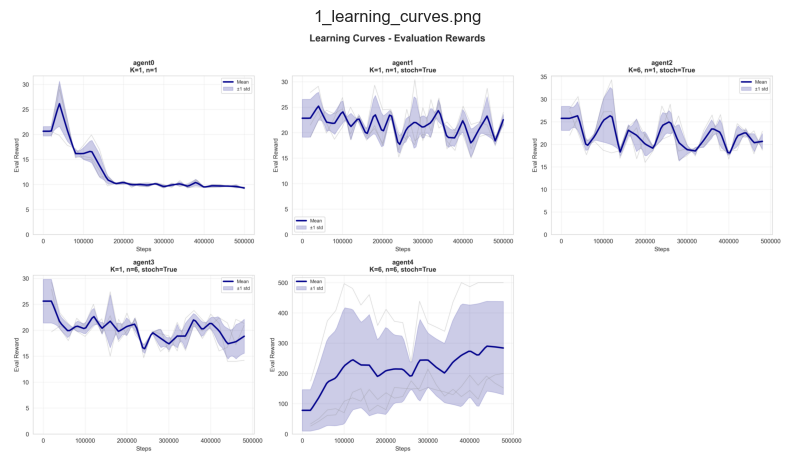

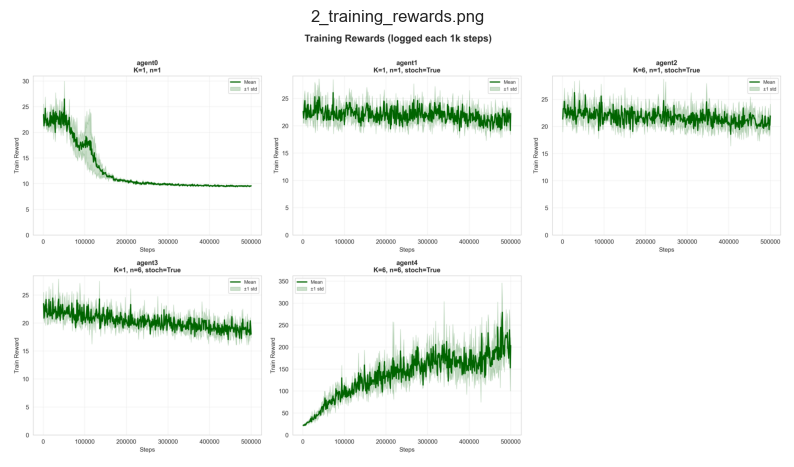

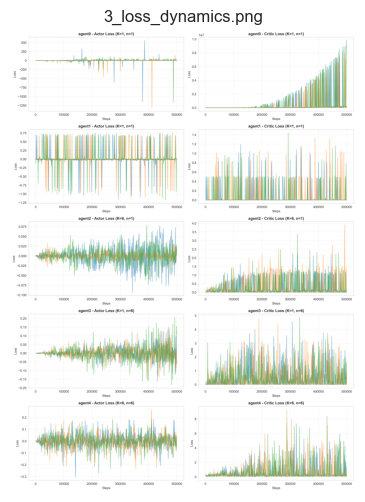

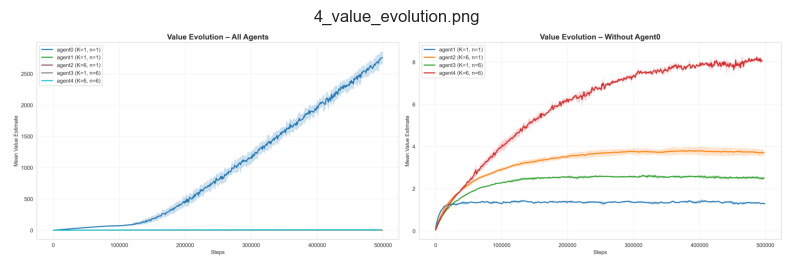

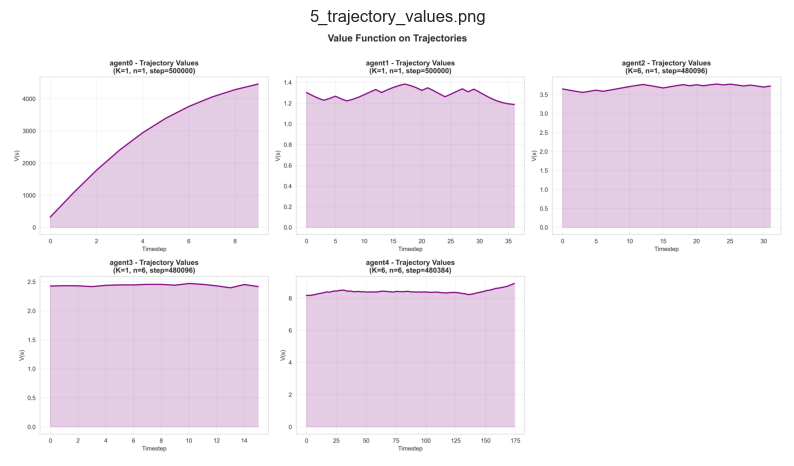

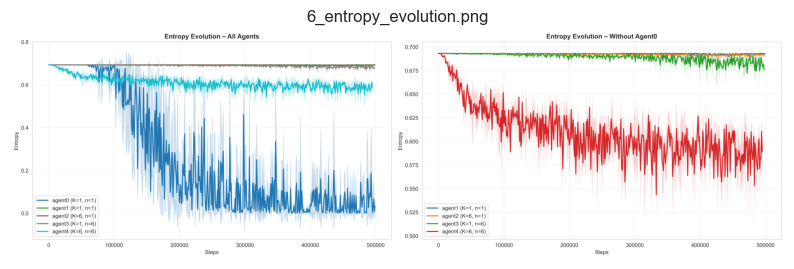

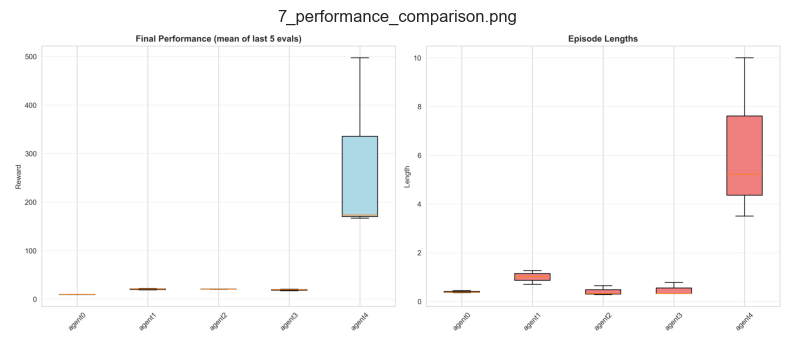

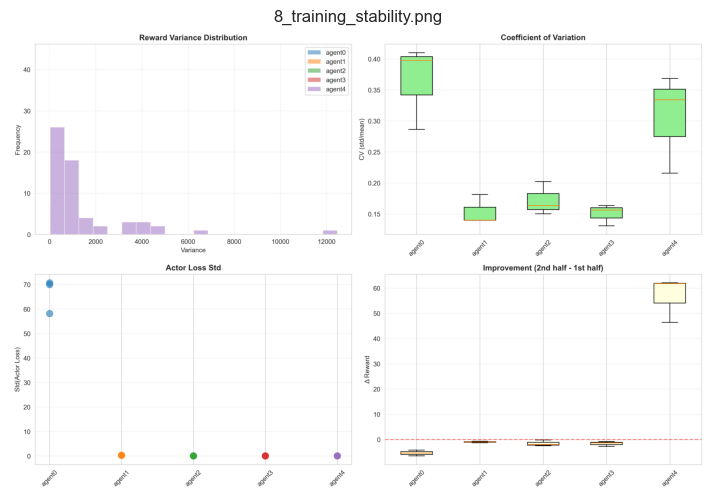

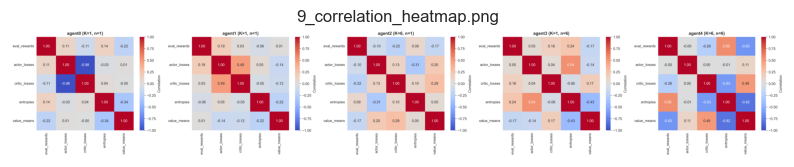

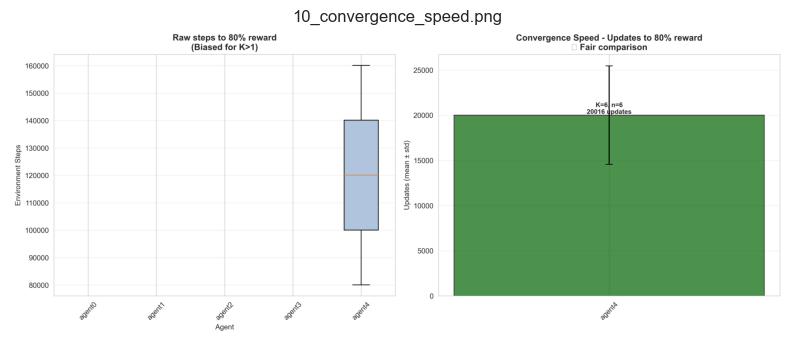

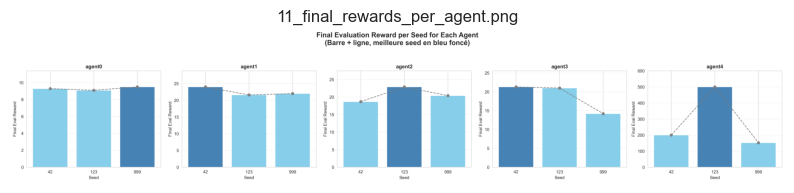

In [8]:
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Racine du projet = parent du dossier notebooks
PROJECT_ROOT = Path.cwd().parent
plots_dir = PROJECT_ROOT / "plots"

# Lister et trier les PNG
plot_files = sorted(
    [f for f in os.listdir(plots_dir) if f.endswith(".png")],
    key=lambda x: int(x.split("_")[0])
)

# Affichage
for fname in plot_files:
    img_path = plots_dir / fname
    img = mpimg.imread(img_path)
    plt.figure(figsize=(10, 6))
    plt.imshow(img)
    plt.axis("off")
    plt.title(fname)
    plt.show()
